<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-MiniProjects/blob/mp_4/M2_NB_MiniProject_2_DeepLabV3%2B_Lungs_Segmentation_Aishwarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project: Lung Segmentation of Chest X-Ray dataset using DeepLabV3+

## Learning Objectives:

At the end of the experiment, you will be able to:

- understand, prepare, and visualize the the dataset containing image and corresponding masked image used for segmentation
- implement DeepLabV3+ architecture
- create a masked image (prediction)

## Introduction

Semantic segmentation is a computer vision task that involves dividing an image into different regions, each of which is labeled with a semantic category. The goal of semantic segmentation is to enable machines to understand the content of an image at a pixel level, by assigning a label to each individual pixel based on the object or region it belongs to.

This technique is widely used in many applications such as self-driving cars, medical image analysis, and object recognition in robotics. It helps to extract meaningful information from images and to understand the relationships between objects and their environment.

The below figure shows how semantic segmentation differs from other algorithms, such as object detection.

<br>
<img src='https://cdn.iisc.talentsprint.com/AIandMLOps/Images/segmentation_vs_other_algos.jpeg' width=700px>
<br><br>

Moreover, in contrast to object detection, which detects and localizes objects within an image, semantic segmentation is more precise and detailed. It provides a much more granular understanding of the content of an image, allowing for more advanced and accurate applications.

## Dataset

*  The Chest X-Ray dataset is made up of images and segmentated mask from two diffrent sources - Shenzhen and Montgomery dataset
*  The CXR_png folder consists of Chest X-Rays and the masks folder has the segmented mask
*  There are 704 images with their masks mapped with each other  

<br>
$\quad$<img src='https://cdn.extras.talentsprint.com/AIandMLOps/Images/semantic_segmentation.png' width=700px>
<br><br>


## Problem Statement

Perfrom the lungs segmentation on Chest X-Ray dataset using DeepLabV3+ model.

## Grading = 10 Points

In [2]:
#@title Download the data
!wget https://cdn.iisc.talentsprint.com/AIandMLOps/MiniProjects/Datasets/LungSegmentation.zip
!unzip -qq LungSegmentation.zip
print("Data Downloaded Successfuly!!")

--2024-06-06 16:11:58--  https://cdn.iisc.talentsprint.com/AIandMLOps/MiniProjects/Datasets/LungSegmentation.zip
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139904834 (133M) [application/zip]
Saving to: ‘LungSegmentation.zip’

LungSegmentation.zi 100%[===================>] 133.42M  46.1MB/s    in 2.9s    

2024-06-06 16:12:02 (46.1 MB/s) - ‘LungSegmentation.zip’ saved [139904834/139904834]

Data Downloaded Successfuly!!


### Import required packages

In [3]:
import os
import cv2
import numpy as np
from glob import glob
from PIL import Image
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pathlib

### **PART-A**

### Data Visualization (1 point)

#### Image Visualization
Visualize one of the Chest X-Ray image and its segmented label image.

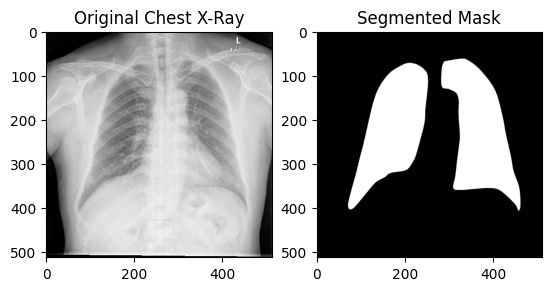

In [4]:
# Visualize an image
# Visualize a semantic part segmentation label image
# YOUR CODE HERE

image_path = '/content/LungSegmentation/CXR_png/CHNCXR_0001_0.png'
mask_path = '/content/LungSegmentation/masks/CHNCXR_0001_0.png'

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Chest X-Ray')

# Plot the segmented mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Segmented Mask')

plt.show()

### Create a TensorFlow Dataset (1 points)
Use the image size, batch size, number of classes, and data directory as given in the below code cell.

Hint:
1. Find all the image files in the CXR_png and masks subdirectory separately. The resulting list should be sorted in ascending order.
2. Create a list of validation image, validation masks, test image, test masks, etc.
3. Create a function that reads an image file and returns a preprocessed image tensor.  

In [5]:
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 2
DATA_DIR = "./LungSegmentation"

# Find paths for all the image files in the 'CXR_png' subdirectory of the DATA_DIR directory.
# Sort the list of file paths in ascending order
images_dir = pathlib.Path("./LungSegmentation/CXR_png")
mask_dir = pathlib.Path("./LungSegmentation/masks")

all_images = images_dir.glob("*")


# Find paths for all the mask files in the 'masks' subdirectory of the DATA_DIR directory.
# Sort the list of file paths in ascending order
all_masks = mask_dir.glob("*")

#stratified samples
#C & 0
#C & 1
#M & 0
#M & 1
images_1_C0 = sorted(list(images_dir.glob("C*0.*")))
images_2_C1 = sorted(list(images_dir.glob("C*1.*")))
images_3_M0 = sorted(list(images_dir.glob("M*0.*")))
images_4_M1 = sorted(list(images_dir.glob("M*1.*")))

masks_1_C0 = sorted(list(mask_dir.glob("C*0.*")))
masks_2_C1 = sorted(list(mask_dir.glob("C*1.*")))
masks_3_M0 = sorted(list(mask_dir.glob("M*0.*")))
masks_4_M1 = sorted(list(mask_dir.glob("M*1.*")))









In [6]:
print(images_4_M1)


[PosixPath('LungSegmentation/CXR_png/MCUCXR_0104_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0108_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0113_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0117_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0126_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0140_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0141_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0142_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0144_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0150_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0162_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0166_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0170_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0173_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0182_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0188_1.png'), PosixPath('LungSegmentation/CXR_png/MCUCXR_0194_1.png'), PosixPath('LungSegmentation/CX

In [7]:
print(masks_4_M1)

[PosixPath('LungSegmentation/masks/MCUCXR_0104_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0108_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0113_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0117_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0126_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0140_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0141_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0142_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0144_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0150_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0162_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0166_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0170_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0173_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0182_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0188_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0194_1.png'), PosixPath('LungSegmentation/masks/MCUCXR_0195_1.png'), PosixPath

In [8]:
train_images = []
train_masks = []
val_images = []
val_masks = []
test_images = []
test_masks = []


In [9]:
images = []
masks = []

In [10]:

def extract_train_images(images_dir, masks_dir):
    total_len =  len(images_dir)
    images = images_dir[0: int(total_len * 0.6)]
    masks = masks_dir[0: int(total_len * 0.6)]
    return images, masks


In [11]:

def extract_val_images(images_dir, masks_dir):
    total_len =  len(images_dir)
    images = images_dir[int(total_len * 0.6): int(total_len * 0.8)]
    masks = masks_dir[int(total_len * 0.6): int(total_len * 0.8)]
    return images, masks

In [12]:
def extract_test_images(images_dir, masks_dir):
    total_len =  len(images_dir)
    images = images_dir[int(total_len * 0.8): ]
    masks = masks_dir[int(total_len * 0.8):]
    return images, masks

In [13]:
for i in [(images_1_C0,masks_1_C0),(images_2_C1,masks_2_C1), (images_4_M1,masks_4_M1), (images_3_M0,masks_3_M0) ]:
    images, masks = extract_train_images(i[0],i[1])
    train_images.extend(images)
    train_masks.extend(masks)

In [14]:
for i in [(images_1_C0,masks_1_C0),(images_2_C1,masks_2_C1), (images_4_M1,masks_4_M1), (images_3_M0,masks_3_M0) ]:
    images, masks = extract_val_images(i[0],i[1])
    val_images.extend(images)
    val_masks.extend(masks)

In [15]:
for i in [(images_1_C0,masks_1_C0),(images_2_C1,masks_2_C1), (images_4_M1,masks_4_M1), (images_3_M0,masks_3_M0) ]:
    images, masks = extract_test_images(i[0],i[1])
    test_images.extend(images)
    test_masks.extend(masks)

In [16]:
print(train_images)
print(train_masks)
print(val_images)
print(val_masks)
print(test_images)
print(test_masks)

[PosixPath('LungSegmentation/CXR_png/CHNCXR_0001_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0002_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0003_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0004_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0005_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0006_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0007_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0008_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0009_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0010_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0011_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0012_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0013_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0014_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0015_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0016_0.png'), PosixPath('LungSegmentation/CXR_png/CHNCXR_0017_0.png'), PosixPath('LungSegmentation/CX

In [17]:
train_images = ['./' + str(image) for image in train_images]
train_masks = ['./' + str(mask) for mask in train_masks]
val_images = ['./' + str(image) for image in val_images]
val_masks = ['./' + str(mask) for mask in val_masks]
test_images = ['./' + str(image) for image in test_images]
test_masks = ['./' + str(mask) for mask in test_masks]

In [18]:
print(train_images)
print(train_masks)
print(val_images)
print(val_masks)
print(test_images)
print(test_masks)

['./LungSegmentation/CXR_png/CHNCXR_0001_0.png', './LungSegmentation/CXR_png/CHNCXR_0002_0.png', './LungSegmentation/CXR_png/CHNCXR_0003_0.png', './LungSegmentation/CXR_png/CHNCXR_0004_0.png', './LungSegmentation/CXR_png/CHNCXR_0005_0.png', './LungSegmentation/CXR_png/CHNCXR_0006_0.png', './LungSegmentation/CXR_png/CHNCXR_0007_0.png', './LungSegmentation/CXR_png/CHNCXR_0008_0.png', './LungSegmentation/CXR_png/CHNCXR_0009_0.png', './LungSegmentation/CXR_png/CHNCXR_0010_0.png', './LungSegmentation/CXR_png/CHNCXR_0011_0.png', './LungSegmentation/CXR_png/CHNCXR_0012_0.png', './LungSegmentation/CXR_png/CHNCXR_0013_0.png', './LungSegmentation/CXR_png/CHNCXR_0014_0.png', './LungSegmentation/CXR_png/CHNCXR_0015_0.png', './LungSegmentation/CXR_png/CHNCXR_0016_0.png', './LungSegmentation/CXR_png/CHNCXR_0017_0.png', './LungSegmentation/CXR_png/CHNCXR_0018_0.png', './LungSegmentation/CXR_png/CHNCXR_0019_0.png', './LungSegmentation/CXR_png/CHNCXR_0020_0.png', './LungSegmentation/CXR_png/CHNCXR_0021

In [19]:
type(train_images)

list

In [20]:
# Function to read an image file and returns a preprocessed image tensor.
# The mask argument is set to False by default, indicating that it is an image file, not a mask file.

from tensorflow import image as tf_image
from tensorflow import io as tf_io

def read_image(image_path, mask = False):  #Pre-processing Images

    image = tf_io.read_file(image_path)
    if mask:
        image = tf_image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf_image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf_image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])

    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    return image


Create a **load_data** function that takes in two arguments, **image_list** and **mask_list**, which are lists of file paths to the images and corresponding masks, respectively. It then reads in the image and mask using the **read_image** function defined earlier. The function returns a tuple of **image** and **mask**.

In [21]:
def load_data(image_path, mask_path):
    image = read_image(image_path)
    mask = read_image(mask_path, mask=True)
    return image, mask


Create a **data_generator** function that takes in **image_list** and **mask_list** as arguments.

The function should:
- create a **tf.data.Dataset** object from the input data
- map the **load_data** function to each element in the dataset
- convert the dataset into batches of size **BATCH_SIZE**, drop any incomplete batch at the end of the dataset
- return the resulting dataset

In [22]:
def data_generator(image_list, mask_list):
    # Create a dataset from image and mask lists
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data)
    #Batch the dataset and drop any incomplete batch
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

    return dataset

train_dataset = data_generator(train_images,train_masks)
train_dataset = train_dataset.shuffle(buffer_size=len(train_images))
val_dataset = data_generator(val_images, val_masks)
test_dataset = data_generator(test_images,test_masks)

print('Train  Dataset: ', train_dataset)
print('Val  Dataset: ',  val_dataset)

# Example usage:
for batch in train_dataset.take(2):
    images_batch, masks_batch = batch
    print(images_batch.shape)  # Shape should be (batch_size, IMAGE_SIZE, IMAGE_SIZE, 3)
    print(masks_batch.shape)


Train  Dataset:  <_ShuffleDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
Val  Dataset:  <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
(4, 512, 512, 3)
(4, 512, 512, 1)
(4, 512, 512, 3)
(4, 512, 512, 1)


Check the total images for train and validation.

In [23]:
# YOUR CODE HERE
print('Total no images in Train set: ',len(train_dataset)*BATCH_SIZE)
print('Total no images in Val set: ',len(val_dataset)*BATCH_SIZE)

Total no images in Train set:  420
Total no images in Val set:  140


Check the number of batches formed in train and validation set.


In [24]:
# YOUR CODE HERE

# YOUR CODE HERE
print('Total no images in Train batches: ',int(len(train_dataset)))
print('Total no images in Val Batches: ',int(len(val_dataset)))


Total no images in Train batches:  105
Total no images in Val Batches:  35


Now, we have created our TensorFlow Dataset. Further, let us try to understand the DeepLabV3+ model.

### **PART-B**

### Building the DeepLabV3+ model

Downsampling is widely adopted in deep convolutional neural networks (CNN) for reducing memory consumption while preserving the transformation invariance to some degree.

Multiple downsampling of a CNN will lead the feature map resolution to become smaller, resulting in lower prediction accuracy and loss of boundary information in semantic segmentation.

DeepLabv3+ helps in solving these issues by including **atrous convolutions**. They aggregate context around a feature which helps in segmenting it better.

<br>

#### **Atrous Convolution/Dilated Convolution**

It is a tool for refining the effective field of view of the convolution. It modifies the field of view using a parameter termed ***atrous rate*** or ***dilation rate***.

With dilated convolution, as we go deeper in the network, we can keep the stride constant but with larger field-of-view without increasing the number of parameters or the amount of computation. It also enables larger output feature maps, which is useful for semantic segmentation.

In the below figure, Atrous/Dilated Convolution has wider field of view with same number of parameters as Normal convolution.

<br>
<img src="https://cdn.iisc.talentsprint.com/AIandMLOps/Images/Dilated_Conv.jpg" width=500px>
<br><br>



#### **DeepLabv3+**

Earlier version, DeepLabv3 has a problem of consuming too much time to process high-resolution images. DeepLabv3+ is a semantic segmentation architecture that improves upon DeepLabv3 with several improvements, such as adding an effective decoder module to refine the segmentation results.

The below figure shows the typical architecture of DeepLabv3+. The encoder module processes multiscale contextual information by applying dilated/atrous convolution at multiple scales, while the decoder module refines the segmentation results along object boundaries.

<br>
<img src="https://cdn.iisc.talentsprint.com/AIandMLOps/Images/deeplabv3_plus_model.png" width=1000px>
<br><br>

Deeplabv3+ employs Aligned Xception network as its main feature extractor (encoder), although with substantial modifications. Depth-wise separable convolution replaces all max pooling procedures.

In Model Playground, we can select feature extraction (encoding) network to use as either **Resnet** or EfficientNet.

The reason for using **Dilated Spatial Pyramid Pooling** is that it was shown that as the sampling rate becomes larger, the number of valid filter weights (i.e., weights that are applied to the valid feature region, instead of padded zeros) becomes smaller.


### Create the model (5 points)
First, create different functions  to implement DeepLabV3+ architecture.



Create a function, **convolution_block()**, to add a convolution layer, a BatchNormalization layer, and apply ReLu activation in one go.

In [25]:
# YOUR CODE HERE
def convolution_block(block_input, num_filters=256, kernel_size=3, dilation_rate=1, padding="same", use_bias=False):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
        )(block_input)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    return x

Create another function to perform **Dilated Spatial Pyramid Pooling**. Use above function to add different convolution blocks.

In [26]:
# YOUR CODE HERE
def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

The encoder features are first bilinearly upsampled by a factor 4, and then concatenated with the corresponding low-level features from the network backbone that have the same spatial resolution. Here, we use a **ResNet50** pretrained on ImageNet as the backbone model, and we use
the low-level features from the `conv4_block6_2_relu` block of the backbone.

##### Exploring ResNet-50 architecture before using it.

In [27]:
res_input = keras.Input(shape=(128, 128, 3))
resnet50 = keras.applications.ResNet50(weights="imagenet", include_top=False, input_tensor = res_input)

# Layers present in ResNet-50 network
resnet50.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                      

From the above layers,

- Use the low-level features from the `conv2_block3_2_relu` layer of the ResNet-50 network to fead in Decoder.

- Use the features from the `conv4_block6_2_relu` layer of the ResNet-50 to fead in Dilated Spatial Pyramid Pooling module.

#### Create Encoder
Create a function to implement the architecture for Encoder block. Use **ResNet50** pretrained on ImageNet as the backbone network. Use the features from the **conv4_block6_2_relu** layer of the backbone to fead in Dilated Spatial Pyramid Pooling module. Then return the backbone network along with encoder output.

In [28]:
# YOUR CODE HERE
def Encoder(model_input):
    # Backbone network
    resnet50 = keras.applications.ResNet50(weights="imagenet", include_top=False, input_tensor=model_input)
    # Features from backbone network to fead in DSPP
    x = resnet50.get_layer("conv4_block6_2_relu").output
    # DSPP module
    concat_out = DilatedSpatialPyramidPooling(x)
    # 1x1 Conv
    output = convolution_block(concat_out, kernel_size=1)

    return resnet50, output

#### Create Decoder

Create a function to implement the architecture for Decoder block. The encoder features are first bilinearly upsampled by a factor 4, and then concatenated with the corresponding low-level features (the **conv2_block3_2_relu** layer) from the network backbone that have the same spatial resolution.

In [29]:
# YOUR CODE HERE
def Decoder(image_size, back_network, x):
    # Output from Encoder, upsample by 4
    input_a = layers.UpSampling2D(size = (image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
                                  interpolation = "bilinear")(x)
    # Low-level features from backbone network
    input_b = back_network.get_layer("conv2_block3_2_relu").output
    # Add 1x1 Conv on low-level features
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    # Concat
    x = layers.Concatenate(axis=-1)([input_a, input_b])
    # Add 3x3 Conv blocks
    x = convolution_block(x)
    x = convolution_block(x)

    # Resultant upsample by 4
    output = layers.UpSampling2D(size = (image_size // x.shape[1], image_size // x.shape[2]),
                            interpolation = "bilinear")(x)
    return output

#### Building full architecture of the Model

Write a function that combines the encoder and decoder functions defined above to create & implement a complete  DeepLabV3+ architecture.

In [30]:
# YOUR CODE HERE
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    # Encoder part
    back_network, x = Encoder(model_input)
    # Decoder part
    x = Decoder(image_size, back_network, x)

    # Output/prediction layer
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)

    return keras.Model(inputs=model_input, outputs=model_output)

In [31]:
# Create model
deeplab_model = DeeplabV3Plus(image_size = 512, num_classes = 2)
deeplab_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 518, 518, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 256, 256, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 256, 256, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### Training (1 point)

We train the model using sparse categorical crossentropy as the loss function, and
Adam as the optimizer.

##### Compile model


In [32]:
# YOUR CODE HERE
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
deeplab_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                      loss = loss,
                      metrics = ["accuracy"])

In [ ]:
'''

def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


deeplab_model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
deeplab_model.summary()

'''

##### Model Training

In [33]:


 YOUR CODE HERE
#TRAIN_LENGTH = info.splits['train'].num_examples
EPOCHS = 20
VAL_SUBSPLITS = 5
#STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'  # 'min' for loss, 'max' for accuracy
)

deeplab_model_history = deeplab_model.fit(train_dataset, epochs=EPOCHS,
                                          #steps_per_epoch=STEPS_PER_EPOCH,
                                          #validation_steps=VALIDATION_STEPS,
                                          validation_data=val_dataset,
                                          callbacks=[checkpoint_callback])


Epoch 1/20
105/105 [==============================] - ETA: 0s - loss: 0.1017 - accuracy: 0.9561

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/105 [==============================] - 93s 411ms/step - loss: 0.1017 - accuracy: 0.9561 - val_loss: 1.6231 - val_accuracy: 0.7505
Epoch 2/20
105/105 [==============================] - 46s 413ms/step - loss: 0.0556 - accuracy: 0.9735 - val_loss: 2.1232 - val_accuracy: 0.7505
Epoch 3/20
105/105 [==============================] - 46s 424ms/step - loss: 0.0529 - accuracy: 0.9747 - val_loss: 1.5566 - val_accuracy: 0.7505
Epoch 4/20
105/105 [==============================] - 47s 429ms/step - loss: 0.0488 - accuracy: 0.9757 - val_loss: 0.7231 - val_accuracy: 0.7505
Epoch 5/20
105/105 [==============================] - 47s 422ms/step - loss: 0.0464 - accuracy: 0.9766 - val_loss: 1.3876 - val_accuracy: 0.7505
Epoch 6/20
105/105 [==============================] - 46s 426ms/step - loss: 0.0456 - accuracy: 0.9764 - val_loss: 0.9241 - val_accuracy: 0.7504
Epoch 7/20
105/105 [==============================] - 45s 413ms/step - loss: 0.0456 - accuracy: 0.9763 - val_loss: 0.6860 - val_accuracy: 0.7

In [45]:

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=15)

In [46]:
deeplab_model_history2 = deeplab_model.fit(train_dataset, epochs=EPOCHS,
                                          #steps_per_epoch=STEPS_PER_EPOCH,
                                          #validation_steps=VALIDATION_STEPS,
                                          validation_data=val_dataset,
                                          callbacks=[checkpoint_callback, early, reduceLROnPlat])

Epoch 1/20
105/105 [==============================] - 43s 390ms/step - loss: 0.0423 - accuracy: 0.9775 - val_loss: 0.1133 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 2/20
105/105 [==============================] - 43s 395ms/step - loss: 0.0303 - accuracy: 0.9817 - val_loss: 0.0976 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 3/20
105/105 [==============================] - 42s 386ms/step - loss: 0.0261 - accuracy: 0.9830 - val_loss: 0.1046 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 4/20
105/105 [==============================] - 43s 397ms/step - loss: 0.0234 - accuracy: 0.9841 - val_loss: 0.2434 - val_accuracy: 0.9187 - lr: 0.0010
Epoch 5/20
105/105 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9849
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
105/105 [==============================] - 43s 391ms/step - loss: 0.0209 - accuracy: 0.9849 - val_loss: 0.1132 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 6/20
105/105 [=============================

We can plot the training and validation loss to see how the training went. This should show generally decreasing values per epoch.

#####  Learning curve from model history (1 point)

In [34]:
# Function to plot learning curves
# YOUR CODE HERE
def display_learning_curves(model_history):
  acc = deeplab_model_history.history["accuracy"]
  val_acc = deeplab_model_history.history["val_accuracy"]
  loss = deeplab_model_history.history["loss"]
  val_loss = deeplab_model_history.history["val_loss"]
  epochs_range = range(EPOCHS)

  fig = plt.figure(figsize=(8,5))

  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="train accuracy")
  plt.plot(epochs_range, val_acc, label="validataion accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="train loss")
  plt.plot(epochs_range, val_loss, label="validataion loss")
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")

  fig.tight_layout()
  plt.show()


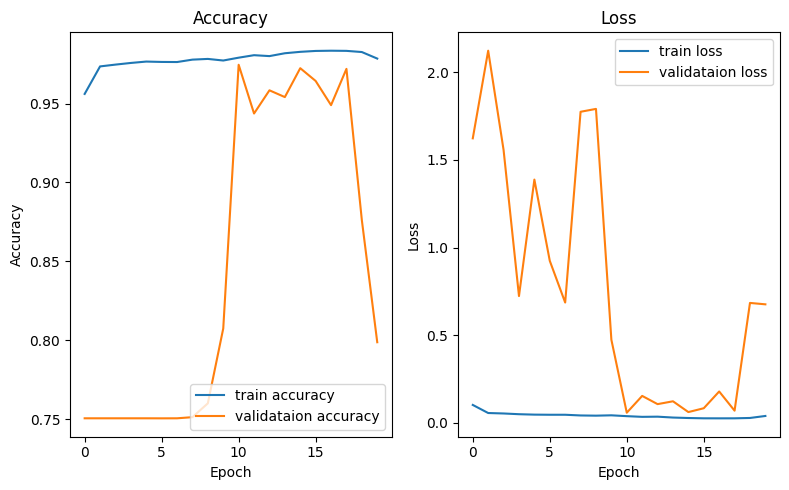

In [35]:
# Display learning curves
# YOUR CODE HERE
display_learning_curves(deeplab_model_history)

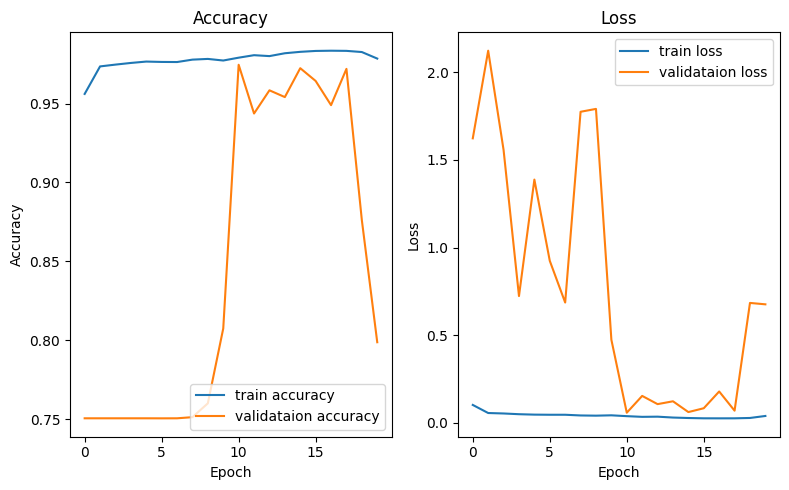

In [49]:
display_learning_curves(deeplab_model_history2)

### Visualize Predictions (1 points)

#### Plot the predictions

In [38]:
# YOUR CODE HERE
def get_test_image_and_annotation_arrays(test):
  '''
  Unpacks the test dataset and returns the input images and segmentation masks
  '''
  images = []
  y_true_segments = []
  for image, annotation in test:
    y_true_segments.append(annotation.numpy())
    images.append(image.numpy())
  print(images[0].shape)

  return images, y_true_segments

In [39]:
def create_mask(pred_mask):
  '''
  Creates the segmentation mask by getting the channel with the highest probability. Remember that we
  have 3 channels in the output of the UNet. For each pixel, the predicition will be the channel with the
  highest probability.
  '''
  pred_mask = tf.argmax(pred_mask, axis=-1) #Stores the highest probability class from the last axis - So the shape is 1,h,w
  pred_mask = pred_mask[..., tf.newaxis] #New Axis is added to the shape - 1,h,w,1
  return pred_mask[0].numpy() #Returns h,w,1

In [40]:
def make_predictions(image, model):
  '''
  Feeds an image to a model and returns the predicted mask.
  '''
  input_shape = model.input_shape
  print(input_shape)
  print(image.shape)
  image = np.reshape(image,(1, image.shape[0], image.shape[1], image.shape[2]))
  pred_mask = model.predict(image)
  pred_mask = create_mask(pred_mask)

  return pred_mask

In [41]:
# Please input a number between 0 to 3647 to pick an image from the dataset
Batch_slider = 4
y_true_images, y_true_segments = get_test_image_and_annotation_arrays(test_dataset)
# Get the prediction mask

(4, 512, 512, 3)


(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 3s 3s/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 30ms/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 24ms/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 25ms/step


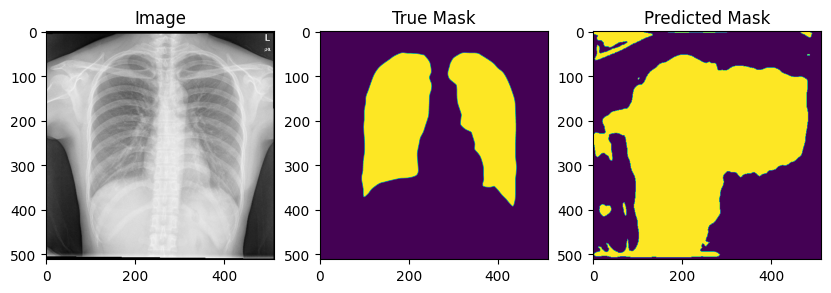

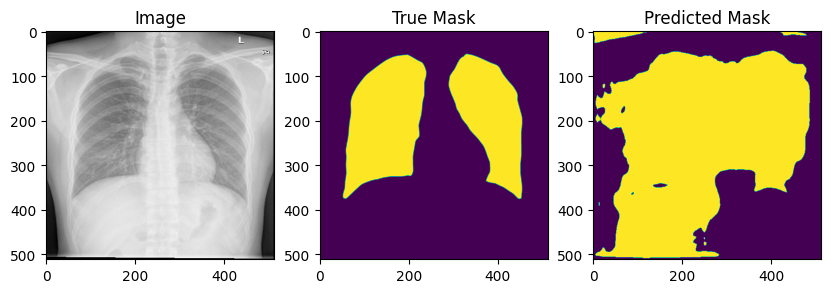

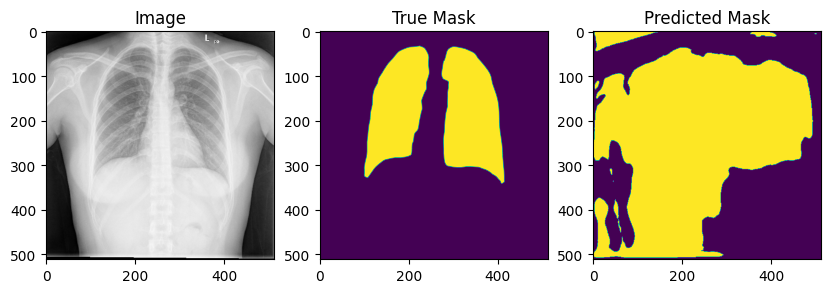

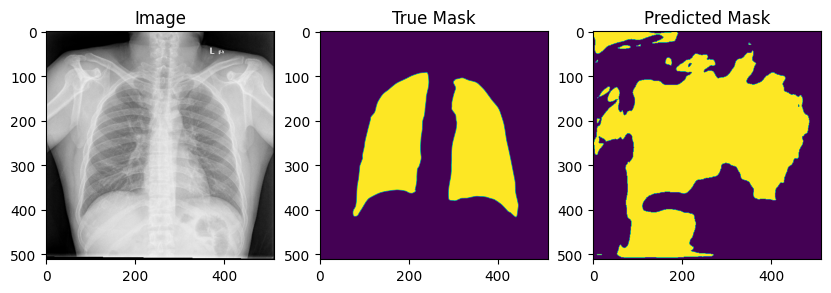

In [42]:
for i in range(BATCH_SIZE):
    y_pred_mask = make_predictions(y_true_images[Batch_slider][i], model = deeplab_model)
    plt.figure(figsize=(10, 10))
    # Original Image
    img_arr = tf.keras.preprocessing.image.array_to_img(y_true_images[Batch_slider][i])
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(img_arr)

    # Ground truth Mask
    img_arr = tf.keras.preprocessing.image.array_to_img(y_true_segments[Batch_slider][i])
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(img_arr)
    # Predicted Mask
    img_arr = tf.keras.preprocessing.image.array_to_img(y_pred_mask)
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(img_arr)

(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 34ms/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 45ms/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 42ms/step
(None, 512, 512, 3)
(512, 512, 3)
1/1 [==============================] - 0s 27ms/step


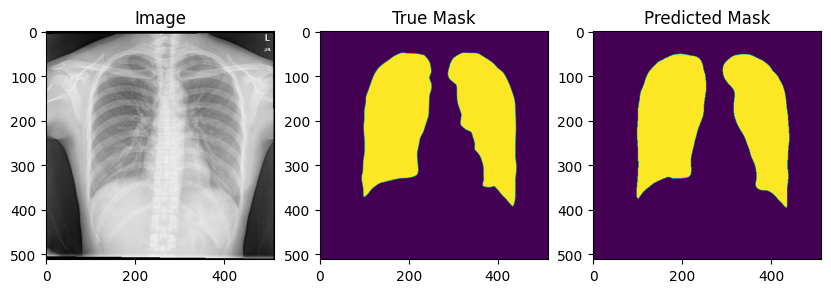

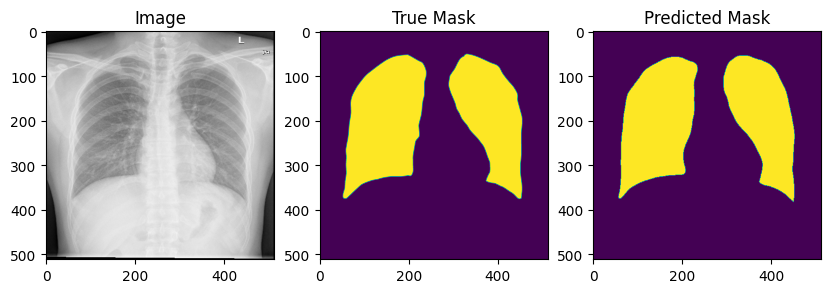

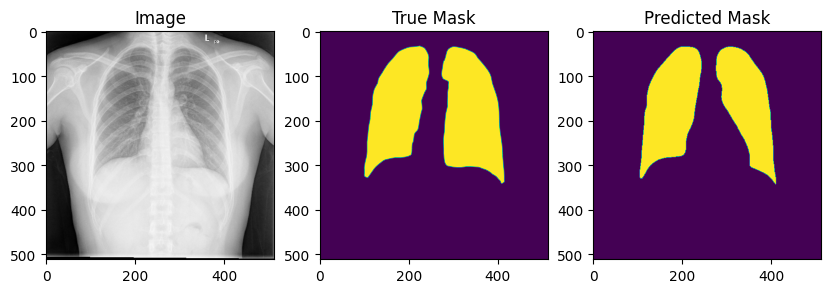

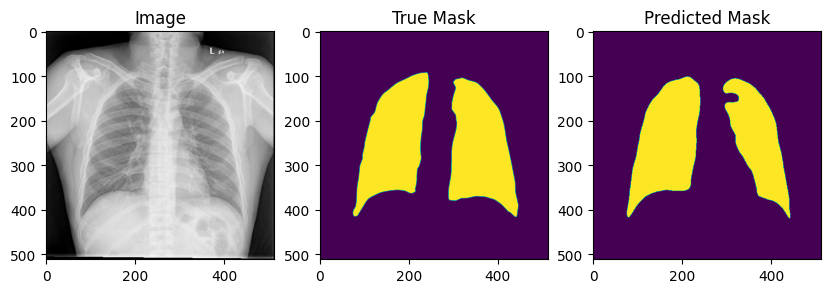

In [50]:
for i in range(BATCH_SIZE):
    y_pred_mask = make_predictions(y_true_images[Batch_slider][i], model = deeplab_model)
    plt.figure(figsize=(10, 10))
    # Original Image
    img_arr = tf.keras.preprocessing.image.array_to_img(y_true_images[Batch_slider][i])
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(img_arr)

    # Ground truth Mask
    img_arr = tf.keras.preprocessing.image.array_to_img(y_true_segments[Batch_slider][i])
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(img_arr)
    # Predicted Mask
    img_arr = tf.keras.preprocessing.image.array_to_img(y_pred_mask)
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(img_arr)

In [54]:
def class_wise_metrics(y_true, y_pred):
    class_wise_iou = []
    class_wise_dice_score = []

    smoothening_factor = 0.00001
    for i in range(2):
        intersection = np.sum((y_pred == i) * (y_true == i))
        y_true_area = np.sum((y_true == i))
        y_pred_area = np.sum((y_pred == i))
        combined_area = y_true_area + y_pred_area

        iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
        class_wise_iou.append(iou)

        dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + 2 * smoothening_factor))
        class_wise_dice_score.append(dice_score)

    return class_wise_iou, class_wise_dice_score

In [65]:
deeplab_results = deeplab_model.predict(test_dataset)
deeplab_results = np.argmax(deeplab_results, axis=3)
deeplab_results = deeplab_results[..., tf.newaxis]

35/35 [==============================] - 4s 110ms/step


In [66]:
# Compute the class wise metrics for all test images
deeplab_cls_wise_iou_scores = []
deeplab_cls_wise_dice_scores = []
for i in range(len(y_true_segments)):
    iou, dice = class_wise_metrics(y_true_segments[i], deeplab_results[i])
    deeplab_cls_wise_iou_scores.append(iou)
    deeplab_cls_wise_dice_scores.append(dice)

# Take average to get the final result over the test set
deeplab_cls_wise_iou = np.array(deeplab_cls_wise_iou_scores).mean(axis=0).round(2)
deeplab_cls_wise_dice_score = np.array(deeplab_cls_wise_dice_scores).mean(axis=0).round(2)

In [71]:
# show the IOU for each class
class_names = ["lungs", "background"]

for idx, iou in enumerate(deeplab_cls_wise_iou):
  spaces = ' ' * (10-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, iou))

lungs       2.77 
background  1.34 


In [72]:
# show the Dice Score for each class
for idx, dice_score in enumerate(deeplab_cls_wise_dice_score):
  spaces = ' ' * (10-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, dice_score))

lungs       1.46 
background  1.11 
